# **Background & Context**

Buying and selling used smartphones, used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.
Information related to demographics, education, the experience is in hands from candidates signup and enrollment.

# **Objective**

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. In this project we will analyze the data for used phones and build various regression models to predict the selling price of a used phone and identify factors that significantly influence it.

# **Data Dictionary**




*   Brand_name: Name of the Mobilephone Brand
*   OS: Operating System
*   Screen_size: Screen Size of the Mobilephone (in CM) 
*   4G: Is 4G supported (Yes/No)
*   5G: Is 5G supported (Yes/No)
*   Main_camera_mp: Rear Camera Quality (in Megapixels)
*   Selfie_camera_mp: Front Camera Quality (in Megapixels)
*   Int memory: ROM capacity of the Phone (in GB)
*   RAM: RAM capacity of the Phone (in GB)
*   Battery: Battery Capacity (in maH)
*   Weight: Weight of the Phone (in grams)
*   Release_year: Year in which the phone was released
*   Days_used: How many days the phone has been used
*   New_price_INR: Selling Price of a new Phone of similar Make & Model (in INR) 
*   Used_price_INR: Selling Price of the used Phone (in INR)









# **Loading Libraries**

In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Removes the limit from the number of displayed columns and rows. 
# This is so I can see the entire dataframe when I print it 
pd.set_option("display.max_columns", None)

#pd.set_option('display.max_rows', None) 
pd.set_option("display.max_rows", 200)

#To build Linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import (
    RandomForestRegressor 
)
from sklearn.neural_network import MLPRegressor

import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 


# **Loading And Exploring The Data**

In [ ]:
# loading the dataset
df = pd.read_csv("/content/drive/MyDrive/Used_Smartphone_Dataset.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")    #f-string

np.random.seed(1)    # To get the same random results every time
df.sample(n=10)


There are 3571 rows and 15 columns.


,Brand_name,OS,Screen_size,4G,5G,Main_camera_mp,Selfie_camera_mp,Int_memory,RAM,Battery,Weight,Release_year,Days_used,New_price_INR,Used_price_INR
2501,Samsung,Android,13.49,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,17909,7163
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.0,2019,195,17861,13440
605,Others,Android,12.70,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,14555,4362
2923,Vivo,Android,19.37,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,19099,12467
941,Others,Others,5.72,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,2687,804
1833,LG,Android,13.49,no,no,8.0,1.3,32.0,4.00,3140.0,161.0,2013,670,21682,8670
671,Apple,iOS,14.92,yes,no,12.0,7.0,64.0,4.00,5493.0,48.0,2018,403,63112,31556
1796,LG,Android,17.78,yes,no,5.0,0.3,16.0,4.00,4000.0,294.8,2014,708,17064,6845
757,Asus,Android,13.49,yes,no,13.0,8.0,32.0,4.00,5000.0,181.0,2017,612,24383,9747
3528,Realme,Android,15.72,yes,no,NaN,16.0,64.0,4.00,4035.0,184.0,2019,433,14412,7211


**Brand_name** contains a lot of brand name information. Let us check how many individual names we have. If they are too many, we can process this column to extract important information.

Rest of the variables looks okay, we will explore the data now.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand_name        3571 non-null   object 
 1   OS                3571 non-null   object 
 2   Screen_size       3571 non-null   float64
 3   4G                3571 non-null   object 
 4   5G                3571 non-null   object 
 5   Main_camera_mp    3391 non-null   float64
 6   Selfie_camera_mp  3569 non-null   float64
 7   Int_memory        3561 non-null   float64
 8   RAM               3561 non-null   float64
 9   Battery           3565 non-null   float64
 10  Weight            3564 non-null   float64
 11  Release_year      3571 non-null   int64  
 12  Days_used         3571 non-null   int64  
 13  New_price_INR     3571 non-null   int64  
 14  Used_price_INR    3571 non-null   int64  
dtypes: float64(7), int64(4), object(4)
memory usage: 418.6+ KB


As expected, **Brand_name, OS, 4G** & **5G** are objects. Rest of all the variables are numeric. Looks like presence of missing values too.

# **Exploratory Data Analysis**

In [ ]:
df.describe()

,Screen_size,Main_camera_mp,Selfie_camera_mp,Int_memory,RAM,Battery,Weight,Release_year,Days_used,New_price_INR,Used_price_INR
count,3571.000000,3391.000000,3569.000000,3561.000000,3561.000000,3565.000000,3564.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,14.803892,9.400454,6.547352,54.532607,4.056962,3067.225666,179.424285,2015.964996,675.391487,21398.256231,9904.609073
std,5.153092,4.818396,6.879359,84.696246,1.391844,1364.206665,90.280856,2.291784,248.640972,17806.759762,10952.122355
min,2.700000,0.080000,0.300000,0.005000,0.030000,80.000000,23.000000,2013.000000,91.000000,823.000000,226.000000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,536.000000,10829.000000,4074.500000
50%,13.490000,8.000000,5.000000,32.000000,4.000000,3000.000000,159.000000,2016.000000,690.000000,17109.000000,6808.000000
75%,16.510000,13.000000,8.000000,64.000000,4.000000,4000.000000,184.000000,2018.000000,872.000000,26315.000000,11357.500000
max,46.360000,48.000000,32.000000,1024.000000,16.000000,12000.000000,950.000000,2020.000000,1094.000000,230776.000000,172757.000000


In [ ]:
df.describe(include="object")

,Brand_name,OS,4G,5G
count,3571,3571,3571,3571
unique,34,4,2,2
top,Others,Android,yes,no
freq,509,3246,2359,3419


***Observations***
1. **Screen_size** is right skewed with a big difference in 3rd quartile and the maximum value. Average **Screen_size** of the phone is 14.8cms.
2. **Main_camera_mp** has a minimum value of 0.08 indicating the presence of feature phones too along side smartphones.
3. **Selfie_camera_mp** has a high of 32MP.
4. **Int_memory** ranging from 0.005GB to 1TB. It has extremely high range, we should check a few of the extreme values to get a sense of the data.
5. **Release_year** shows the latest phone available for sale is for 2020 and the oldest is from 2013.
6. **Days_used** indicates the newest phone available is just 91 days old and the oldest phone is 1000+ days old.
7. **Used_price_INR** is the dependent variable here and it looks heavily skewed.
8. **Brand_name** helps us understand there are 34 unique smartphone brands available in the market.
9. **OS** explains there are 4 major operating systems with most of the phones are **4G** compatible and since **5G** technology is new and not available everywhere less than 5% of the phones are **5G** compatible.

**Since 4G & 5G only has Yes & No values, let's replace them with 1 & 0**

In [ ]:
df["4G"] = df["4G"].replace(["yes", "no"], [1, 0])
df["5G"] = df["5G"].replace(["yes", "no"], [1, 0])

In [ ]:
df.head()

,Brand_name,OS,Screen_size,4G,5G,Main_camera_mp,Selfie_camera_mp,Int_memory,RAM,Battery,Weight,Release_year,Days_used,New_price_INR,Used_price_INR
0,Honor,Android,23.97,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,10061,7839
1,Honor,Android,28.10,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,22480,14557
2,Honor,Android,24.29,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,32403,24207
3,Honor,Android,26.04,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,25143,16246
4,Honor,Android,15.72,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,12698,9357


**Unique values for categorical variables**

In [ ]:
for column in df.columns:
    if df[column].dtype == "object":
       print(column.upper(), ":", df[column].nunique())
       print(df[column].value_counts())
       print("\n") 
       print("*" * 55)
       print("\n")

BRAND_NAME : 34
Others        509
Samsung       364
Huawei        264
LG            212
Lenovo        172
ZTE           141
Xiaomi        134
Oppo          129
Asus          126
Alcatel       125
Nokia         121
Micromax      120
Honor         118
Vivo          117
HTC           110
Motorola      110
Sony           88
Meizu          62
Apple          59
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Celkon         37
Lava           36
Karbonn        30
Spice          30
Coolpad        22
BlackBerry     22
Microsoft      22
OnePlus        22
Google         15
Infinix        10
Name: Brand_name, dtype: int64


*******************************************************


OS : 4
Android    3246
Others      202
Windows      67
iOS          56
Name: OS, dtype: int64


*******************************************************




In [ ]:
# Check the unique values in each column of the dataframe.
df.nunique()

Brand_name            34
OS                     4
Screen_size          127
4G                     2
5G                     2
Main_camera_mp        44
Selfie_camera_mp      37
Int_memory            16
RAM                   14
Battery              354
Weight               613
Release_year           8
Days_used            930
New_price_INR       3030
Used_price_INR      2986
dtype: int64

# **Data Visualization**

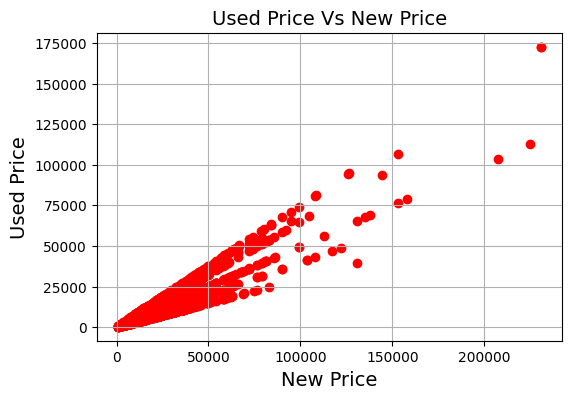

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["New_price_INR"], df["Used_price_INR"], color="red") 
plt.title("Used Price Vs New Price", fontsize=14)
plt.xlabel("New Price", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

***Insights:***
*   Clearly, we can see in the above plot that, when the price of the new phone is increasing, the price of the used phone is also increasing.
*   The relationship is linear, as can be seen from the graph.



**Let's check some more features vs Target Variable to better understand the data:**

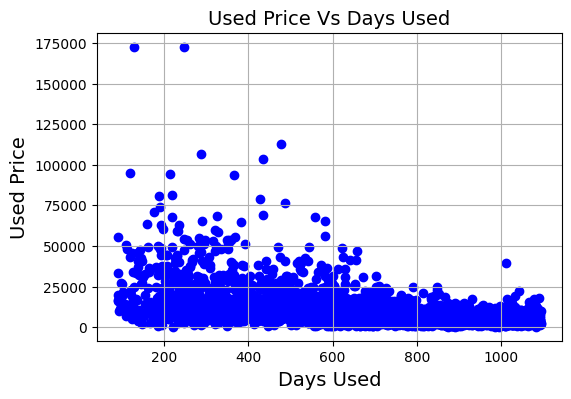

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Days_used"], df["Used_price_INR"], color="blue")
plt.title("Used Price Vs Days Used", fontsize=14)
plt.xlabel("Days Used", fontsize=14)
plt.ylabel("Used Price", fontsize=14) 
plt.grid(True) 
plt.show()

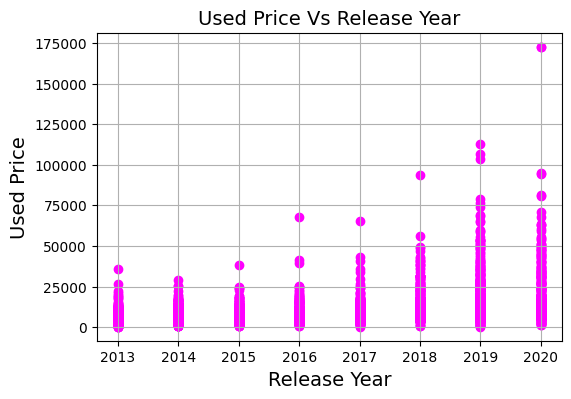

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Release_year"], df["Used_price_INR"], color="magenta") 
plt.title("Used Price Vs Release Year", fontsize=14)
plt.xlabel("Release Year", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

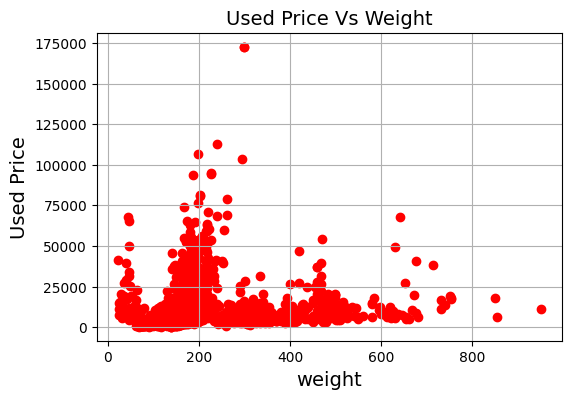

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Weight"], df["Used_price_INR"], color="red")
plt.title("Used Price Vs Weight", fontsize=14)
plt.xlabel("weight", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True) 
plt.show()

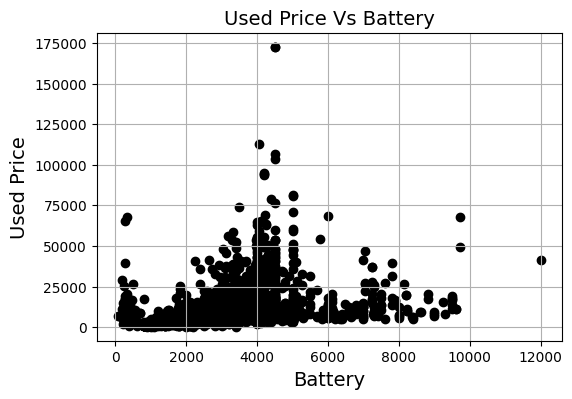

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Battery"], df["Used_price_INR"], color="black") 
plt.title("Used Price Vs Battery", fontsize=14)
plt.xlabel("Battery", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

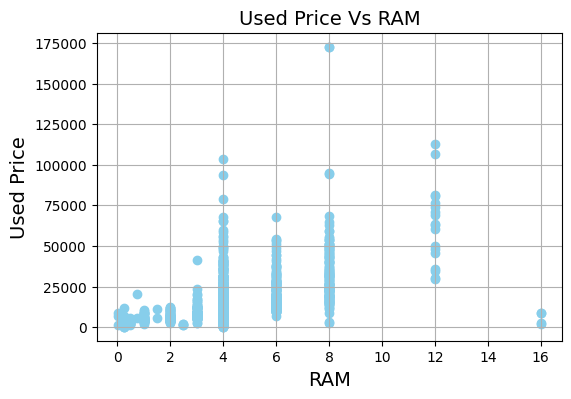

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["RAM"], df["Used_price_INR"], color="skyblue") 
plt.title("Used Price Vs RAM", fontsize=14)
plt.xlabel("RAM", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

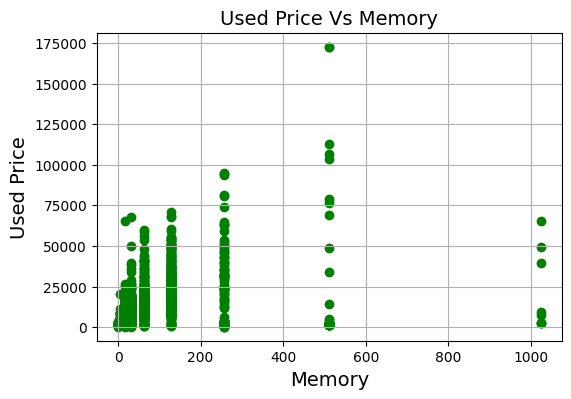

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Int_memory"], df["Used_price_INR"], color="green") 
plt.title("Used Price Vs Memory", fontsize=14)
plt.xlabel("Memory", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

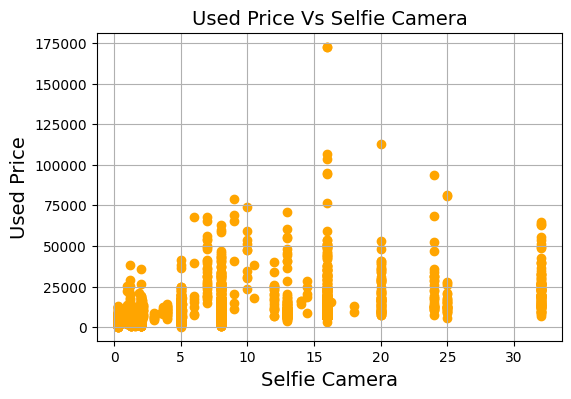

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Selfie_camera_mp"], df["Used_price_INR"], color="orange") 
plt.title("Used Price Vs Selfie Camera", fontsize=14)
plt.xlabel("Selfie Camera", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

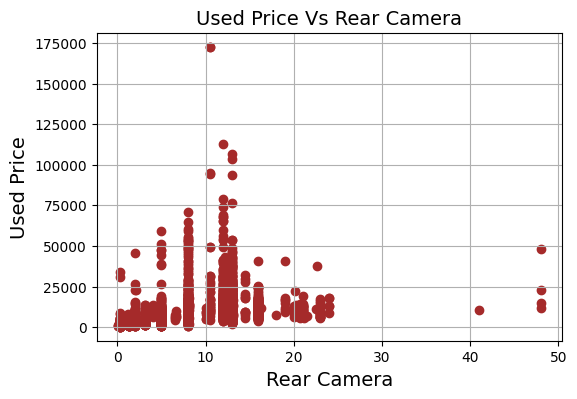

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Main_camera_mp"], df["Used_price_INR"], color="brown")
plt.title("Used Price Vs Rear Camera", fontsize=14)
plt.xlabel("Rear Camera", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True)
plt.show()

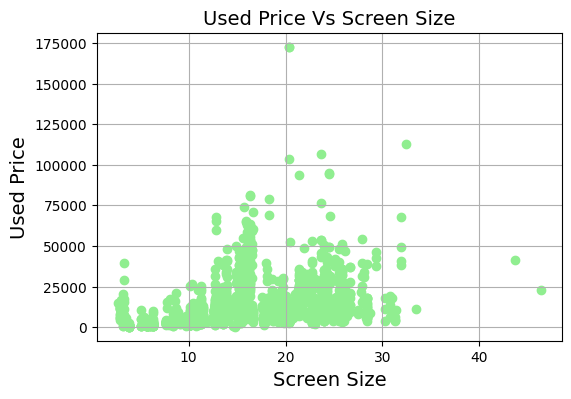

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Screen_size"], df["Used_price_INR"], color="lightgreen") 
plt.title("Used Price Vs Screen Size", fontsize=14)
plt.xlabel("Screen Size", fontsize=14)
plt.ylabel("Used Price", fontsize=14)
plt.grid(True) 
plt.show()

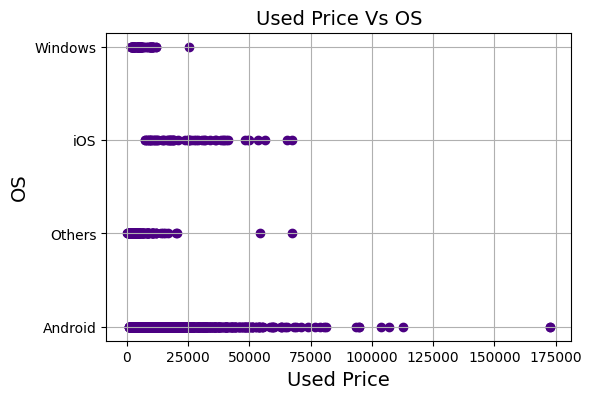

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(df["Used_price_INR"], df["OS"], color="indigo") 
plt.title("Used Price Vs OS", fontsize=14)
plt.xlabel("Used Price", fontsize=14) 
plt.ylabel("OS", fontsize=14)
plt.grid(True) 
plt.show()

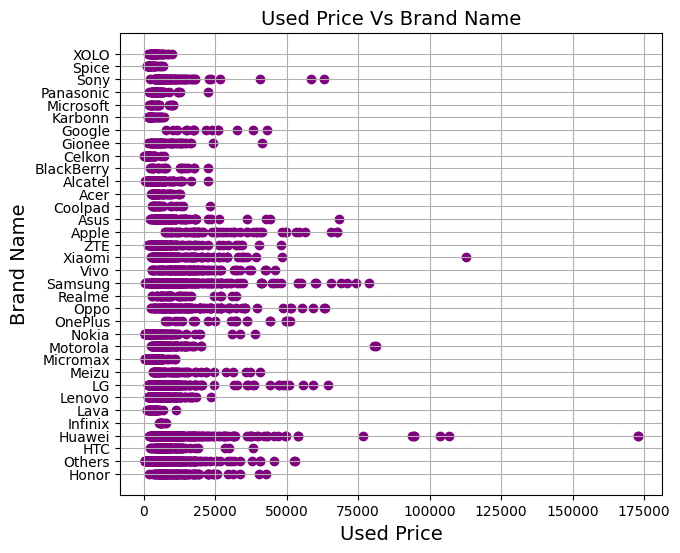

In [ ]:
plt.figure(figsize=(7, 6))
plt.scatter(df["Used_price_INR"], df["Brand_name"], color="purple") 
plt.title("Used Price Vs Brand Name", fontsize=14)
plt.xlabel("Used Price", fontsize=14)
plt.ylabel("Brand Name", fontsize=14) 
plt.grid(True) 
plt.show()

<Axes: xlabel='Used_price_INR', ylabel='Brand_name'>

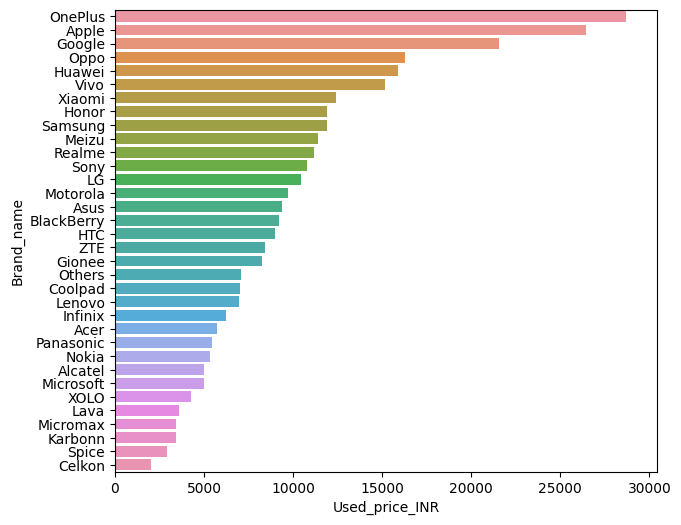

In [ ]:
plt.figure(figsize=(7, 6)) 
sns.barplot(
   y=df["Brand_name"],
   x=df["Used_price_INR"],
   ci=False,
   order=df.groupby("Brand_name").mean()["Used_price_INR"].sort_values(ascending=False).index,
)

<Axes: xlabel='Used_price_INR', ylabel='OS'>

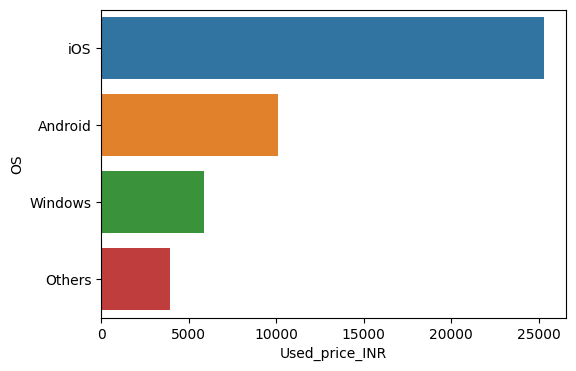

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
   y=df["OS"],
   x=df["Used_price_INR"],
   ci=False,
   order=df.groupby("OS").mean()["Used_price_INR"].sort_values(ascending=False).index,
)

<Axes: xlabel='4G', ylabel='Used_price_INR'>

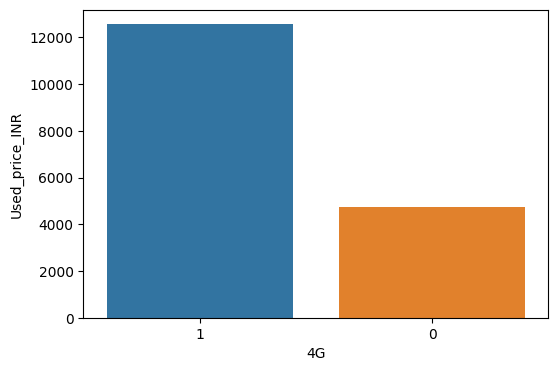

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
   x=df["4G"],
   y=df["Used_price_INR"],
   ci=False,
   order=df.groupby("4G").mean()["Used_price_INR"].sort_values(ascending=False).index,
)

<Axes: xlabel='5G', ylabel='Used_price_INR'>

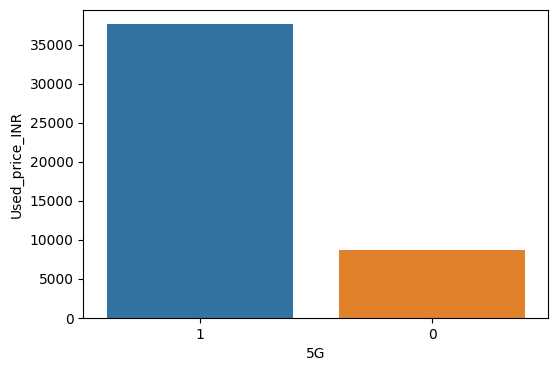

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(
   x=df["5G"],
   y=df["Used_price_INR"],
   ci=False,
   order=df.groupby("5G").mean()["Used_price_INR"].sort_values(ascending=False).index,
)

<Axes: xlabel='Brand_name'>

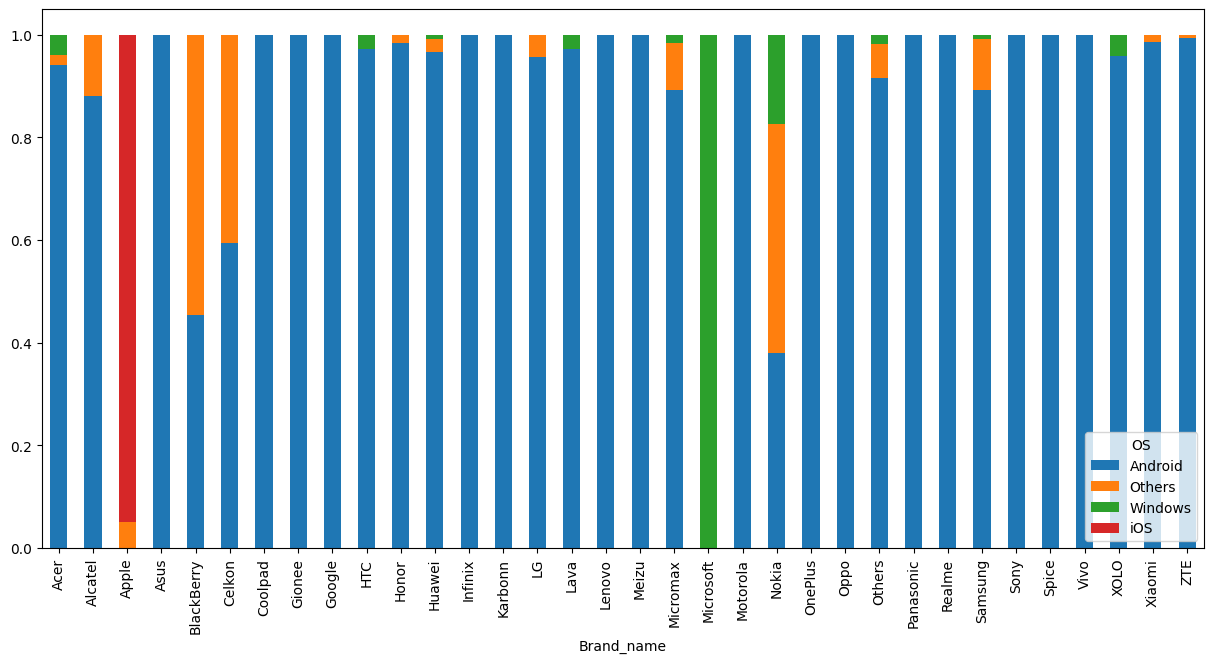

In [ ]:
pd.crosstab(df["Brand_name"], df["OS"], normalize="index").plot( 
  kind="bar", stacked=True, figsize=(15, 7)
)

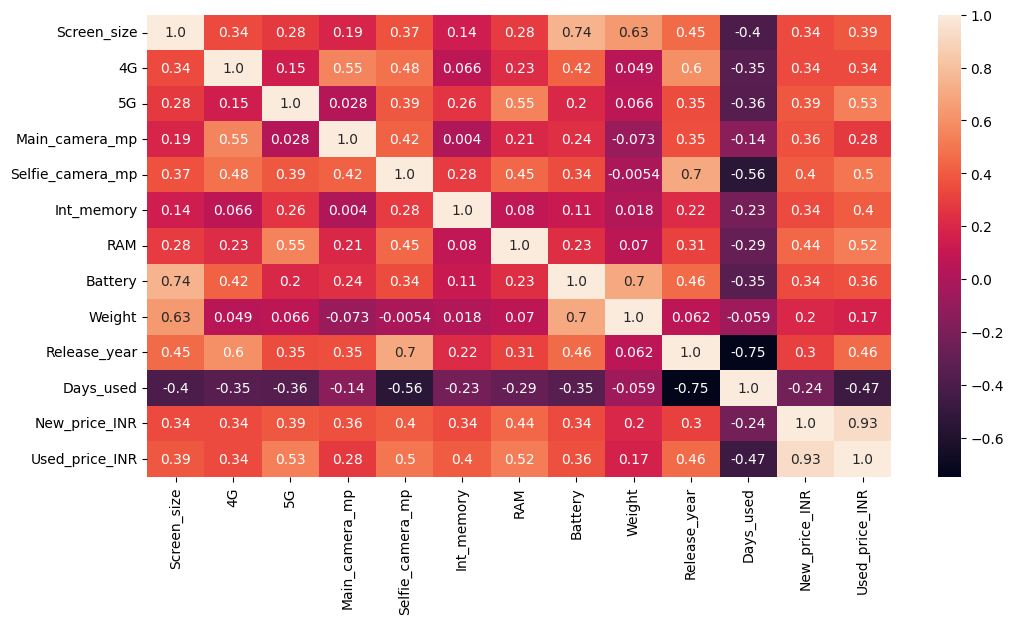

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2")
plt.show()

# **Missing Values**

In [ ]:
df.isnull().sum()

Brand_name            0
OS                    0
Screen_size           0
4G                    0
5G                    0
Main_camera_mp      180
Selfie_camera_mp      2
Int_memory           10
RAM                  10
Battery               6
Weight                7
Release_year          0
Days_used             0
New_price_INR         0
Used_price_INR        0
dtype: int64

In [ ]:
(df.isnull().sum() / df.shape[0] * 100)[df.isnull().sum() > 0]

Main_camera_mp      5.040605
Selfie_camera_mp    0.056007
Int_memory          0.280034
RAM                 0.280034
Battery             0.168020
Weight              0.196024
dtype: float64

In [ ]:
# We'll impute these missing values one by one, by taking median number of main_camera_mp for the particular brand_name
df.groupby(["Brand_name"], as_index=False)["Main_camera_mp"].median()

,Brand_name,Main_camera_mp
0,Acer,5.000
1,Alcatel,5.000
2,Apple,12.000
3,Asus,13.000
4,BlackBerry,8.000
5,Celkon,3.150
6,Coolpad,13.000
7,Gionee,8.000
8,Google,12.200
9,HTC,13.000


In [ ]:
# Impute main_camera_mp
df["Main_camera_mp"] = df.groupby(["Brand_name"])["Main_camera_mp"].transform(
    lambda x: x.fillna(x.median())
)

In [ ]:
df.isnull().sum()

Brand_name           0
OS                   0
Screen_size          0
4G                   0
5G                   0
Main_camera_mp      10
Selfie_camera_mp     2
Int_memory          10
RAM                 10
Battery              6
Weight               7
Release_year         0
Days_used            0
New_price_INR        0
Used_price_INR       0
dtype: int64

In [ ]:
for i in df.columns:
    if df[i].dtype != "object":
        median=df[i].median()
        df[i]=df[i].fillna(median)

In [ ]:
df.isnull().sum()

Brand_name          0
OS                  0
Screen_size         0
4G                  0
5G                  0
Main_camera_mp      0
Selfie_camera_mp    0
Int_memory          0
RAM                 0
Battery             0
Weight              0
Release_year        0
Days_used           0
New_price_INR       0
Used_price_INR      0
dtype: int64

# **Distribution & Outliers**

In [ ]:
df.columns

Index(['Brand_name', 'OS', 'Screen_size', '4G', '5G', 'Main_camera_mp',
       'Selfie_camera_mp', 'Int_memory', 'RAM', 'Battery', 'Weight',
       'Release_year', 'Days_used', 'New_price_INR', 'Used_price_INR'],
      dtype='object')

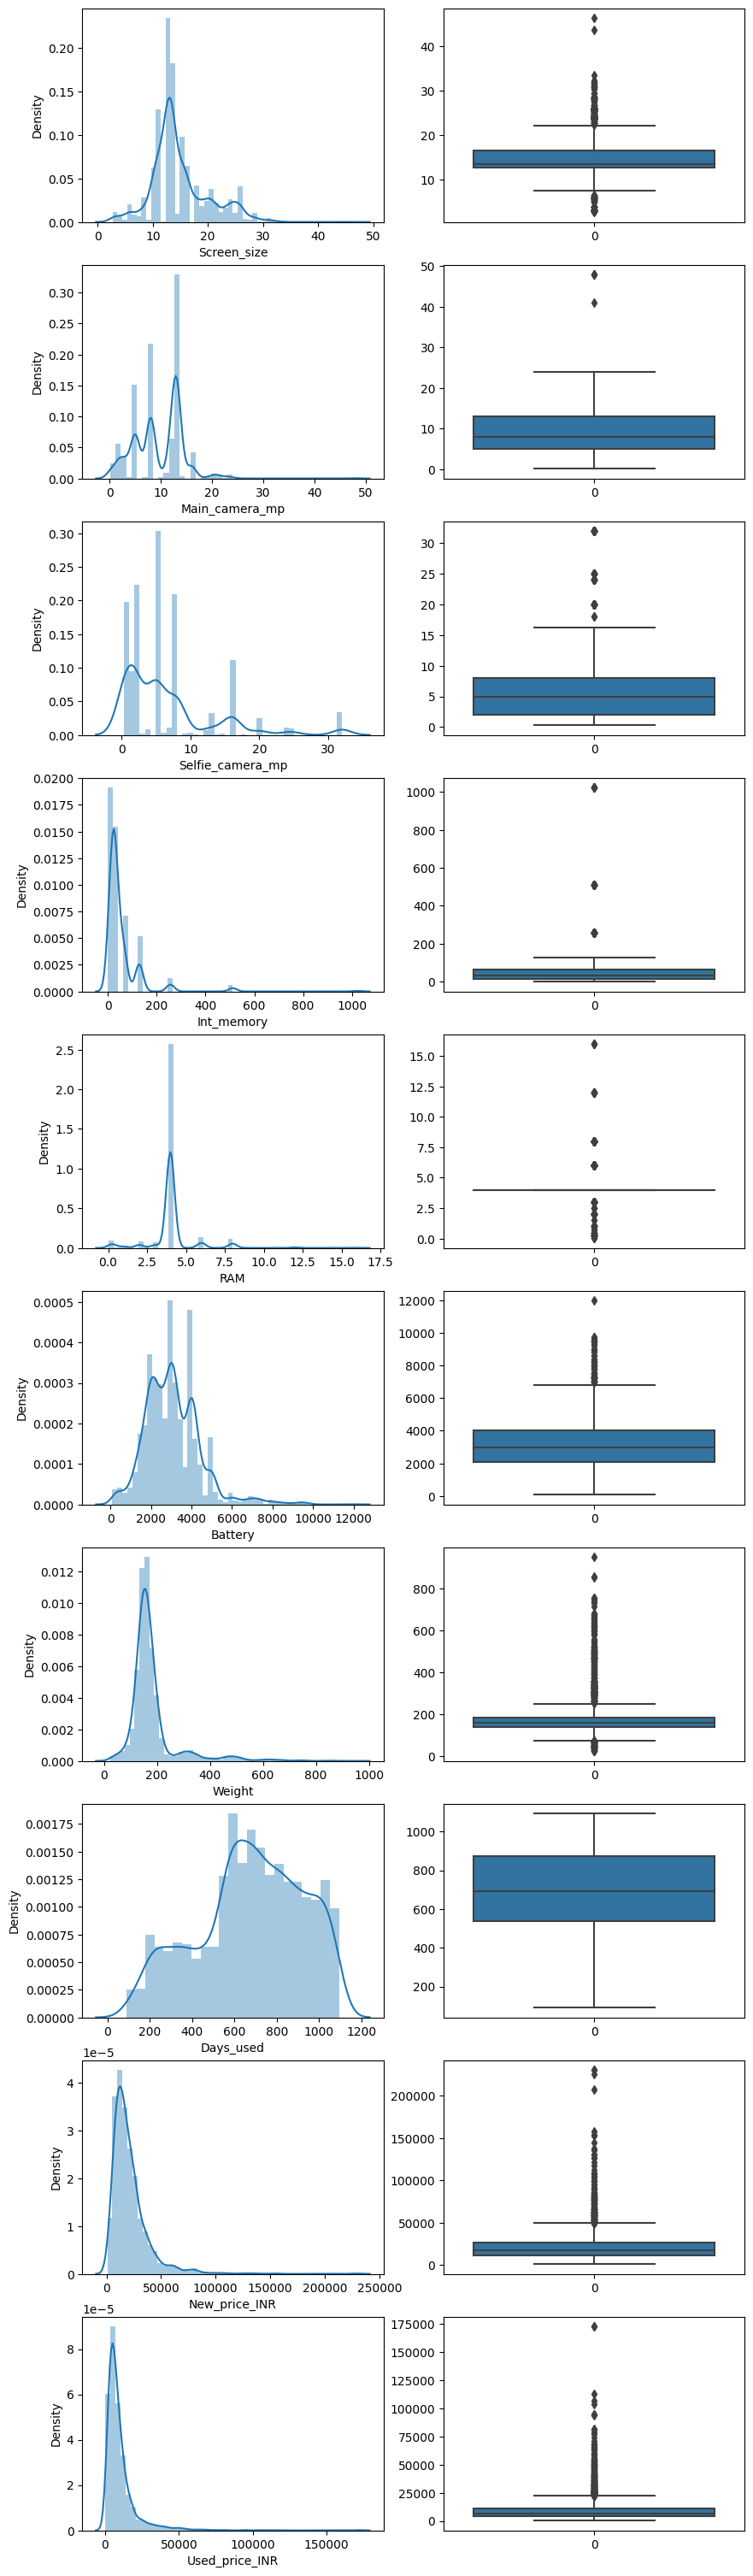

In [ ]:
a = 1
plt.figure(figsize=(10, 50))
for i in df[    
      [
            "Screen_size", 
            "Main_camera_mp",
            "Selfie_camera_mp",
            "Int_memory", 
            "RAM", 
            "Battery",
            "Weight",
            "Days_used",
            "New_price_INR",
            "Used_price_INR"           
      ]
]:
      if df[i].dtype != "object":
          plt.subplot(13, 2, a) 
          sns.distplot(df[i])
          # plt.title("Histogram for:" + i) 
          plt.subplot(13, 2, a + 1) 
          sns.boxplot(df[i])
          # plt.title("Boxplot for:" + i)
          a += 2

In [ ]:
def remove_outlier (col):
    sorted(col)
    q1, q3= np.quantile (col, [0.25, 0.75])
    iqr =  q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5* iqr
    return ll, ul

In [ ]:
for i in df[
      [
            "Screen_size", 
            "Main_camera_mp", 
            "Selfie_camera_mp", 
            "Int_memory", 
            "RAM", 
            "Battery", 
            "Weight",
            "Days_used",
            "New_price_INR"
      ]
]:
      if df[i].dtype != "object":
            ll, ul = remove_outlier(df[i]) 
            df[i]= np.where(df[i] > ul, ul, df[i]) 
            df[i]= np.where(df[i] < ll, ll, df[i])

# **Data Preparation**

In [ ]:
X1 = df.drop(["Used_price_INR"], axis=1) 
y1=df[["Used_price_INR"]]

X1.head()

,Brand_name,OS,Screen_size,4G,5G,Main_camera_mp,Selfie_camera_mp,Int_memory,RAM,Battery,Weight,Release_year,Days_used,New_price_INR
0,Honor,Android,22.225,1,0,13.0,5.0,64.0,4.0,3020.0,146.0,2020,127.0,10061.0
1,Honor,Android,22.225,1,1,13.0,16.0,128.0,4.0,4300.0,213.0,2020,325.0,22480.0
2,Honor,Android,22.225,1,1,13.0,8.0,128.0,4.0,4200.0,213.0,2020,162.0,32403.0
3,Honor,Android,22.225,1,1,13.0,8.0,64.0,4.0,6850.0,250.0,2020,345.0,25143.0
4,Honor,Android,15.720,1,0,13.0,8.0,64.0,4.0,5000.0,185.0,2020,293.0,12698.0


In [ ]:
y1.head()

,Used_price_INR
0,7839
1,14557
2,24207
3,16246
4,9357


In [ ]:
X1 = pd.get_dummies(X1, columns=["Brand_name", "OS"], drop_first=True) 
X1.head()

,Screen_size,4G,5G,Main_camera_mp,Selfie_camera_mp,Int_memory,RAM,Battery,Weight,Release_year,Days_used,New_price_INR,Brand_name_Alcatel,Brand_name_Apple,Brand_name_Asus,Brand_name_BlackBerry,Brand_name_Celkon,Brand_name_Coolpad,Brand_name_Gionee,Brand_name_Google,Brand_name_HTC,Brand_name_Honor,Brand_name_Huawei,Brand_name_Infinix,Brand_name_Karbonn,Brand_name_LG,Brand_name_Lava,Brand_name_Lenovo,Brand_name_Meizu,Brand_name_Micromax,Brand_name_Microsoft,Brand_name_Motorola,Brand_name_Nokia,Brand_name_OnePlus,Brand_name_Oppo,Brand_name_Others,Brand_name_Panasonic,Brand_name_Realme,Brand_name_Samsung,Brand_name_Sony,Brand_name_Spice,Brand_name_Vivo,Brand_name_XOLO,Brand_name_Xiaomi,Brand_name_ZTE,OS_Others,OS_Windows,OS_iOS
0,22.225,1,0,13.0,5.0,64.0,4.0,3020.0,146.0,2020,127.0,10061.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,22.225,1,1,13.0,16.0,128.0,4.0,4300.0,213.0,2020,325.0,22480.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22.225,1,1,13.0,8.0,128.0,4.0,4200.0,213.0,2020,162.0,32403.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22.225,1,1,13.0,8.0,64.0,4.0,6850.0,250.0,2020,345.0,25143.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15.720,1,0,13.0,8.0,64.0,4.0,5000.0,185.0,2020,293.0,12698.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# split the first dataset for price prediction into train and test
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(
     X1, y1, test_size=0.3, random_state=42
)

# **Choose Model, Train and Evaluate**

**Linear Regression**

In [ ]:
linearregression1 = LinearRegression() 
linearregression1.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
# Let us explore the coefficients for each of the independent attributes for first dataset
for idx, col_name in enumerate(X1_train.columns):
    print(
          "The coefficient for {} is {}".format(col_name, linearregression1.coef_[0][idx])
    )

The coefficient for Screen_size is -190.38872512897035
The coefficient for 4G is -1132.51803207177
The coefficient for 5G is 10878.071314754523
The coefficient for Main_camera_mp is -188.46014119615444
The coefficient for Selfie_camera_mp is -44.006876323009664
The coefficient for Int_memory is 22.878594997808964
The coefficient for RAM is -1.2893195844299044e-08
The coefficient for Battery is -0.46046369268080856
The coefficient for Weight is 14.371193680667151
The coefficient for Release_year is 513.9142014577004
The coefficient for Days_used is -9.824468607437717
The coefficient for New_price_INR is 0.6191936541800113
The coefficient for Brand_name_Alcatel is 272.52727201351536
The coefficient for Brand_name_Apple is 18538.367168145236
The coefficient for Brand_name_Asus is -126.4012442262929
The coefficient for Brand_name_BlackBerry is -118.79248240673996
The coefficient for Brand_name_Celkon is 201.9534678165608
The coefficient for Brand_name_Coolpad is 837.4411993491814
The coeff

In [ ]:
# Let us find the intercept for linear regression model for the first dataset
print("The intercept for our model is {}".format(linearregression1.intercept_[0]))

The intercept for our model is -1028695.3928099835


In [ ]:
pred_train1 = linearregression1.predict(X1_train)
pred_test1 = linearregression1.predict(X1_test)

In [ ]:
# R2 Squared:

print("R2 Squared for X1:")

lrscore_train1 = linearregression1.score (X1_train, y1_train) 
lrscore_test1 = linearregression1.score (X1_test, y1_test) 
print(lrscore_train1)
print(lrscore_test1)

R2 Squared for X1:
0.7356025135626156
0.7867541156308481


In [ ]:
# RMSE

print("\nRMSE for X1:")

rmse_lr_train1 = mean_squared_error(y1_train, pred_train1, squared=False) 
rmse_lr_test1 = mean_squared_error(y1_test, pred_test1, squared=False) 
print(rmse_lr_train1)
print(rmse_lr_test1)


RMSE for X1:
5737.979510512665
4824.495956955121


**Now compare the actual output values for X_test with the predicted values, execute the following script:**

In [ ]:
data1 = y1_test.copy()
data1["pred1"] = pred_test1
data1["residual1"] = data1["Used_price_INR"] - data1["pred1"]
data1.head()

,Used_price_INR,pred1,residual1
457,3495,1432.383419,2062.616581
1647,10843,9818.818751,1024.181249
351,30205,36416.006295,-6211.006295
1667,7224,6725.749434,498.250566
1849,5425,5571.076383,-146.076383


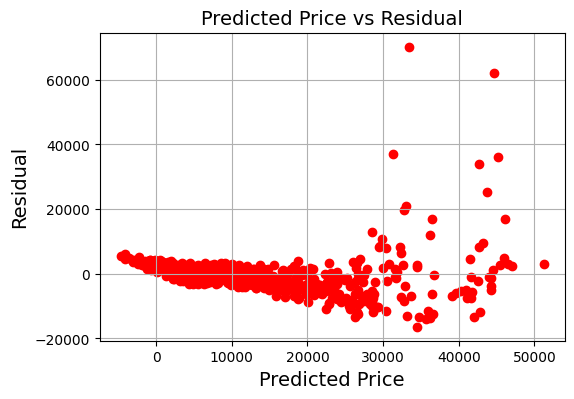

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter (data1["pred1"], data1["residual1"], color="red") 
plt.title("Predicted Price vs Residual", fontsize=14) 
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

<Axes: xlabel='residual1', ylabel='Density'>

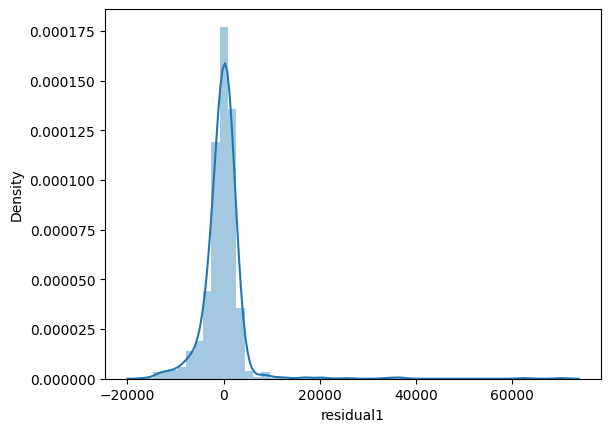

In [ ]:
sns.distplot(data1.residual1)

**Random Forest Regressor**

In [ ]:
rfregressor1 = RandomForestRegressor(max_depth=10, min_samples_split=50, criterion="friedman_mse") 
rfregressor1.fit(X1_train, y1_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=50)

In [ ]:
pred_train1 = rfregressor1.predict(X1_train)
pred_test1 = rfregressor1.predict(X1_test)

In [ ]:
print("\nRF Score for X1:")

rfscore_train1 = rfregressor1.score(X1_train, y1_train)
rfscore_test1 = rfregressor1.score(X1_test, y1_test)
print(rfscore_train1)
print(rfscore_test1)


RF Score for X1:
0.8568196520764579
0.8699097080820359


In [ ]:
print("\nRMSE Score for X1:")
rmse_rf_train1 = mean_squared_error(y1_train, pred_train1, squared=False) 
rmse_rf_test1 = mean_squared_error(y1_test, pred_test1, squared=False)
print(rmse_rf_train1)
print(rmse_rf_test1)


RMSE Score for X1:
4222.523145054621
3768.2010120224813


In [ ]:
data1 = y1_test.copy()
data1["pred1"] = pred_test1
data1["residual1"] = data1["Used_price_INR"] - data1["pred1"]
data1.head()

,Used_price_INR,pred1,residual1
457,3495,3540.934001,-45.934001
1647,10843,10893.093266,-50.093266
351,30205,29464.498745,740.501255
1667,7224,7254.594391,-30.594391
1849,5425,5477.360236,-52.360236


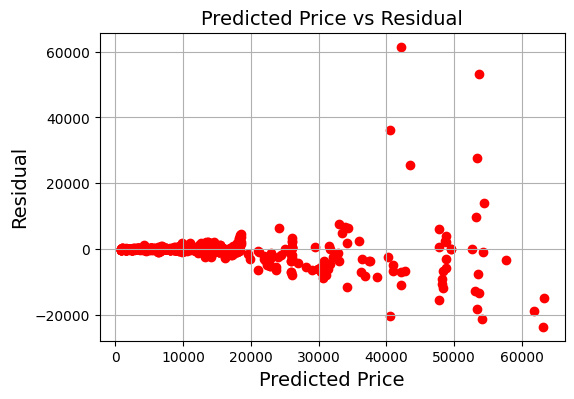

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter (data1["pred1"], data1["residual1"], color="red") 
plt.title("Predicted Price vs Residual", fontsize=14) 
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
pd.DataFrame(rfregressor1.feature_importances_, index=X1_test.columns).sort_values(
        0, ascending=False
)

,0
New_price_INR,0.796897
Days_used,0.152603
Int_memory,0.017894
Weight,0.016206
Brand_name_Xiaomi,0.005000
5G,0.004069
Release_year,0.003113
Battery,0.001668
Brand_name_Huawei,0.001006
Main_camera_mp,0.000590


In [ ]:
mlpregressor1 = MLPRegressor( 
    hidden_layer_sizes=8,
    activation="relu", 
    solver="adam",
    verbose=True,
    n_iter_no_change=1000,
    max_iter=20000,
    tol=0.001,
    random_state=42,
)
mlpregressor1.fit(X1_train, y1_train)

Streaming output truncated to the last 5000 lines.
Iteration 15001, loss = 6717225.12720516
Iteration 15002, loss = 6752296.66487074
Iteration 15003, loss = 6485342.65544035
Iteration 15004, loss = 6743226.89467174
Iteration 15005, loss = 6536432.89859824
Iteration 15006, loss = 6516175.32484583
Iteration 15007, loss = 6673723.80794892
Iteration 15008, loss = 6762513.12190499
Iteration 15009, loss = 6618630.87612434
Iteration 15010, loss = 6769573.77539247
Iteration 15011, loss = 6539050.33363111
Iteration 15012, loss = 6721158.41897616
Iteration 15013, loss = 6623169.31751020
Iteration 15014, loss = 6604241.64503294
Iteration 15015, loss = 6504060.37005933
Iteration 15016, loss = 6602719.45864405
Iteration 15017, loss = 6549075.34170410
Iteration 15018, loss = 6552327.89986110
Iteration 15019, loss = 6786867.12569993
Iteration 15020, loss = 6550070.19203602
Iteration 15021, loss = 6650989.59351075
Iteration 15022, loss = 6663324.65796110
Iteration 15023, loss = 6511927.92230091
Iterat

MLPRegressor(hidden_layer_sizes=8, max_iter=20000, n_iter_no_change=1000,
             random_state=42, tol=0.001, verbose=True)

In [ ]:
pred_train1 = mlpregressor1.predict(X1_train) 
pred_test1 = mlpregressor1.predict(X1_test)

In [ ]:
mlpscore_train1 = mlpregressor1.score (X1_train, y1_train) 
mlpscore_test1 = mlpregressor1.score (X1_test, y1_test)
print(mlpscore_train1) 
print(mlpscore_test1)

0.9169042943363778
0.8129092969508542


In [ ]:
 # RMSE
rmse_mlp_train1 = mean_squared_error(y1_train, pred_train1, squared=False) 
rmse_mlp_test1 = mean_squared_error(y1_test, pred_test1, squared=False) 
print(rmse_mlp_train1)
print(rmse_mlp_test1)

3216.7671288950824
4518.951926514923


In [ ]:
data1 = y1_test.copy()
data1["pred1"] = pred_test1
data1["residual1"] = data1["Used_price_INR"] - data1["pred1"]
data1.head()

,Used_price_INR,pred1,residual1
457,3495,2950.664390,544.335610
1647,10843,9971.072877,871.927123
351,30205,27827.232011,2377.767989
1667,7224,7170.828768,53.171232
1849,5425,6125.000565,-700.000565


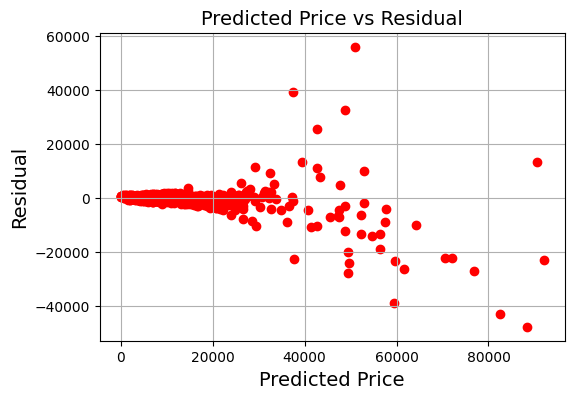

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter (data1["pred1"], data1["residual1"], color="red") 
plt.title("Predicted Price vs Residual", fontsize=14) 
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
train_score1 = [] 
train_score1.extend(
    [
        lrscore_train1,
        rfscore_train1, 
        mlpscore_train1,
    ]
)

test_score1 = [] 
test_score1.extend(
    [
        lrscore_test1,
        rfscore_test1,
        mlpscore_test1,
    ]
)

rmse_train1 = [] 
rmse_train1.extend(
    [
        rmse_lr_train1,
        rmse_rf_train1,
        rmse_mlp_train1,
     ]
)

rmse_test1 = [] 
rmse_test1.extend(
    [
        rmse_lr_test1, 
        rmse_rf_test1,
        rmse_mlp_test1,
    ]
)

In [71]:
comparison_frame = pd.DataFrame(
        {
            "Model": [
                "Linear Regression",
                "Random Forest",
                "Artificial Neural Network",
           ],
           "Train_Score": train_score1, 
           "Test_Score": test_score1, 
           "Train_RMSE": rmse_train1, 
           "Test_RMSE": rmse_test1,
        }
)

comparison_frame["Diff_In_Score"] = np.abs(
        comparison_frame["Train_Score"] - comparison_frame["Test_Score"]
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values (by="Diff_In_Score", ascending=True)

,Model,Train_Score,Test_Score,Train_RMSE,Test_RMSE,Diff_In_Score
1,Random Forest,0.856820,0.869910,4222.523145,3768.201012,0.013090
0,Linear Regression,0.735603,0.786754,5737.979511,4824.495957,0.051152
2,Artificial Neural Network,0.916904,0.812909,3216.767129,4518.951927,0.103995


From the above Comparison frame, we would conclude that the **Random Forest Machine Learning (ML) model** is the most efficient price prediction ML model with the minimum Diff_In_Score of 0.013090 among the various ML models. 